In [ ]:
import numpy as np                           #For calculations
import matplotlib.pyplot as plt              #For making graphs
import pandas as pd                          #For operations on dataframes
import seaborn as sns

In [ ]:
df=pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:

df.shape

(45211, 17)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.head(

)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
condition = df.poutcome == 'other'
df2 = df.drop(df[condition].index, axis = 0, inplace = False)

# Deleting rows in which column 'education' and 'job' contains 'unknown'
col = ['education','job']
for column in col:
  condition = df2[column] == 'unknown'
  df2 = df2.drop(df2[condition].index, axis = 0)

In [ ]:
# Removing outliers based on zscore > 3 or zscore < -3
from scipy.stats import zscore

df2['balance_outliers'] = df2['balance']
df2['balance_outliers']= zscore(df2['balance_outliers']) #Creating an extra column with z scores and eliminating rows based on that

condition = (df2['balance_outliers']>3) | (df2['balance_outliers']<-3 )
df2 = df2.drop(df2[condition].index, axis = 0)

In [ ]:

df3=df2.drop('balance_outliers',axis=1)

In [ ]:

df4=pd.get_dummies(df3,columns=['y'])  #Performing one hot encoding and removing one y_no column
df4.drop('y_no',axis=1,inplace=True)
df4=df4.rename(columns={'y_yes':'response'})
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,False


In [ ]:

# Dropping column 'contact' which is not useful
df4.drop('contact',axis=1,inplace=True)

In [ ]:

#Converting 'duration' to minutes
df4['duration'] = df4['duration'].apply(lambda n:n/60).round(2)
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,False
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,False
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,False
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,False


In [ ]:
#Encoding months to integers
df4['month'] = df4['month'].replace(to_replace=['jan','feb','mar','apr','may',
                                              'jun','jul','aug','sep','oct','nov','dec']
                                  , value=['1', '2','3','4','5','6','7','8','9',
                                           '10','11','12'])
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,False
1,44,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,False
5,35,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,False
6,28,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,False


In [ ]:
# Dropping rows with duration <5s
condition = (df4['duration']<5/60)
df5 = df4.drop(df4[condition].index, axis = 0)

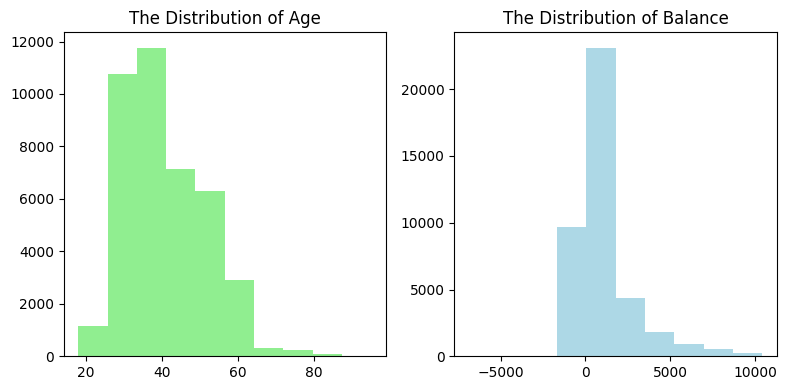

In [ ]:
#Visualizing distribution of 'age' and 'balance'
age_balance_dist = plt.figure(figsize = (8,4))

ax1 = age_balance_dist.add_subplot(1,2,1)
ax2 = age_balance_dist.add_subplot(1,2,2)

ax1.hist(df5['age'], color = 'lightgreen')
ax1.set_title('The Distribution of Age')

ax2.hist(df5['balance'], color = 'lightblue')
ax2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

In [ ]:
df5.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000
mean,40.770840,1071.247548,15.866909,4.311098,2.772094,32.286561,0.436908
std,10.468806,1708.372387,8.313072,4.308268,3.102816,90.808529,1.573430
min,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000
25%,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000
50%,39.000000,420.000000,16.000000,3.000000,2.000000,-1.000000,0.000000
75%,48.000000,1330.000000,21.000000,5.300000,3.000000,-1.000000,0.000000
max,95.000000,10399.000000,31.000000,81.970000,58.000000,871.000000,55.000000


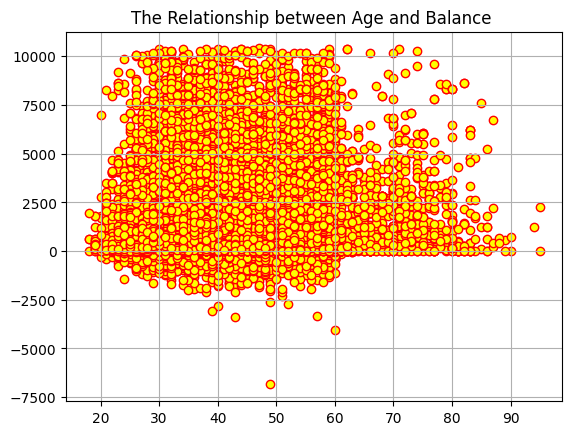

In [ ]:

# Visulizing relationship between age and balance

plt.figsize = (7,5)
plt.scatter(df5['age'],df5['balance'],c='yellow',edgecolor='red')
plt.grid(True)

plt.title('The Relationship between Age and Balance ')
plt.show()

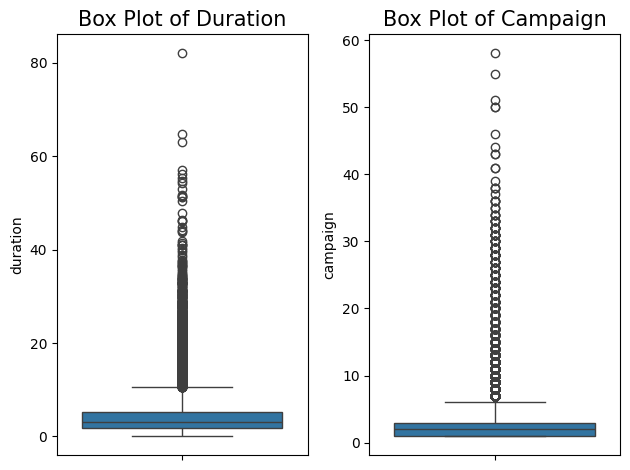

In [ ]:

# Visualizing the distribution of duration and campaign

plt.figsize = (10,6)
fig, axes = plt.subplots(1, 2)

sns.boxplot(y=df5['duration'],ax=axes[0])
sns.boxplot(y=df5['campaign'],ax=axes[1])

axes[0].set_title('Box Plot of Duration',size=15)
axes[1].set_title('Box Plot of Campaign',size=15)

plt.tight_layout()
plt.show()

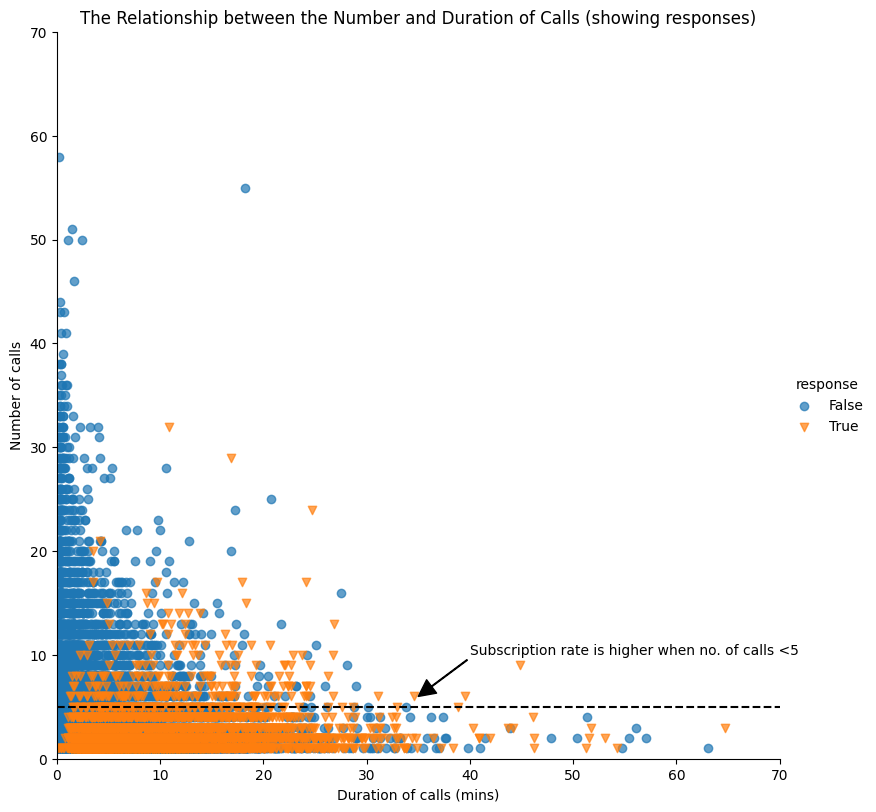

In [ ]:
# Visualizing the relationship between duration, number of calls and response
call_dur = sns.lmplot(x='duration', y='campaign',data = df5,
                     hue = 'response',markers =['o', 'v'],
                     scatter_kws={'alpha':0.7}, height =8,fit_reg = False)

plt.axis([0,70,0,70])
plt.title('The Relationship between the Number and Duration of Calls (showing responses)')
plt.xlabel('Duration of calls (mins)')
plt.ylabel('Number of calls')

# Annotation
plt.axhline(y=5, linewidth=1.5, color="k", linestyle='--')
plt.annotate('Subscription rate is higher when no. of calls <5',xytext = (40,10),
             arrowprops=dict(color = 'k', width=0.5),xy=(35,6))
plt.show()

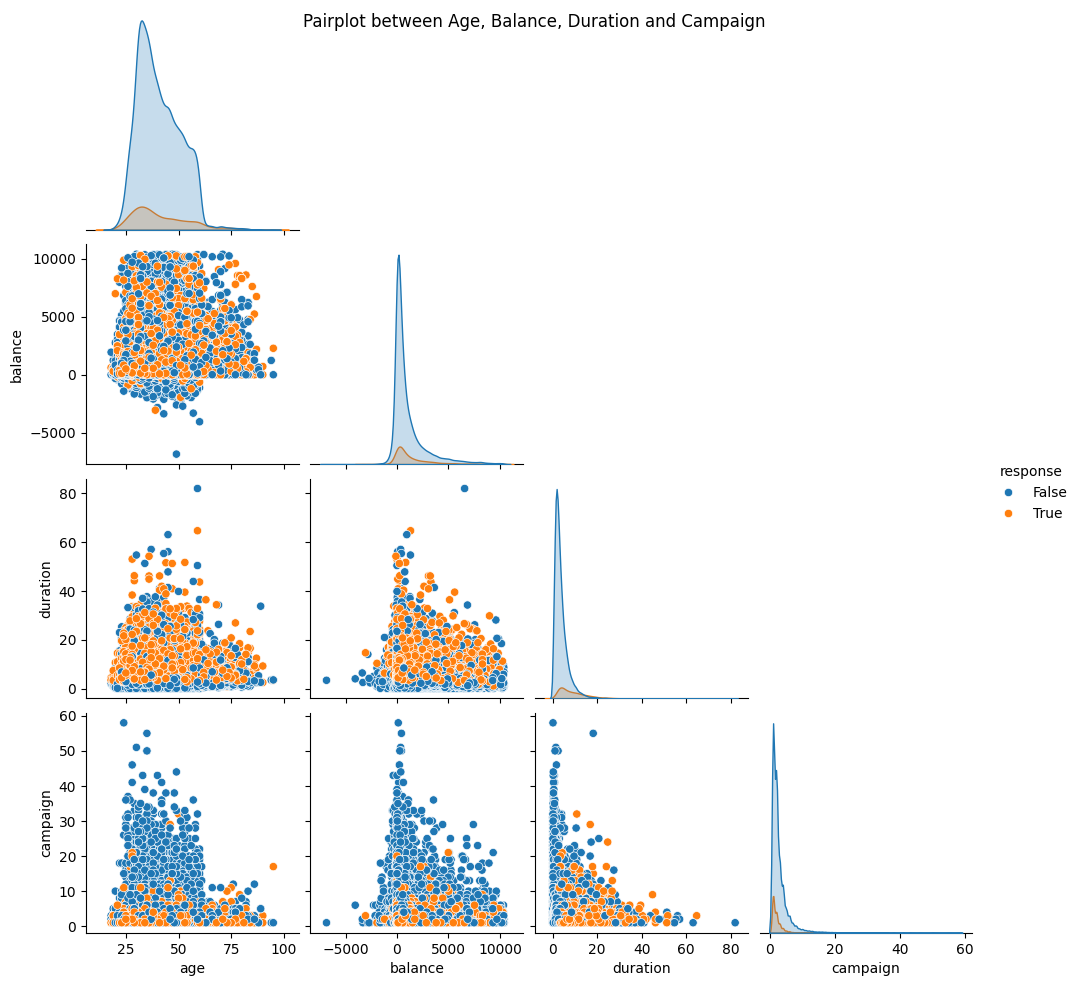

In [ ]:


# Plotting a pairplot between age, balance, duration and campaign
sns.pairplot(df5,x_vars=['age','balance','duration','campaign'],
             y_vars= ['age','balance','duration','campaign'],
             hue='response',corner=True)
plt.suptitle('Pairplot between Age, Balance, Duration and Campaign')

plt.show()

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


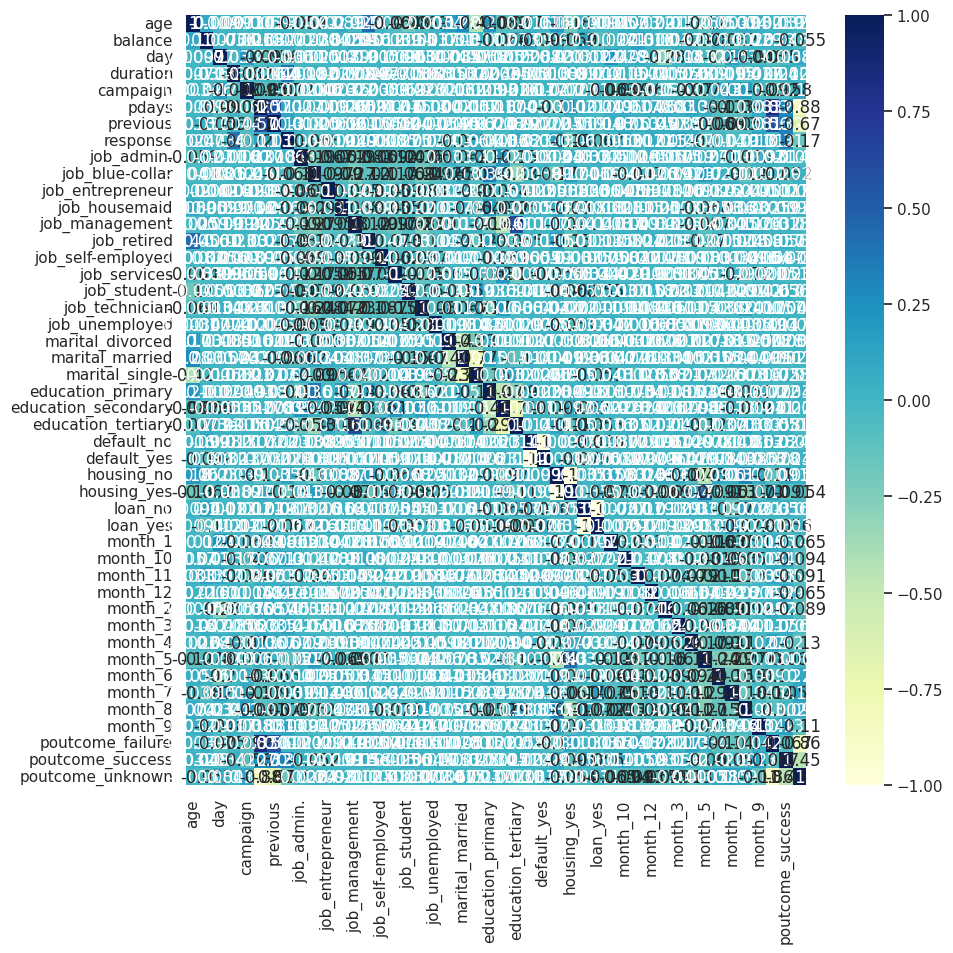

In [ ]:
# Dropping rows with duration <5s
condition = (df4['duration'] < 5/60)
df5 = df4.drop(df4[condition].index, axis=0)

# Converting categorical variables to numeric using one-hot encoding
df5_encoded = pd.get_dummies(df5)

# Plotting the heatmap for the numeric variables
sns.set(rc={"figure.figsize":(10, 10)})
ax = sns.heatmap(df5_encoded.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [ ]:
age = pd.DataFrame(df_temp['age group'].value_counts())
age['% Contacted'] = age['age group']*100/age['age group'].sum()
age['% Subscription'] = age_response_pct['Yes']
age.drop('age group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
age

KeyError: 'age group'

In [ ]:
# Creating a copy of df5
df_temp = df5.copy()

# Assigning 'age group' based on 'age' column values
df_temp.loc[df_temp["age"] < 30, 'age group'] = 20
df_temp.loc[(df_temp["age"] >= 30) & (df_temp["age"] <= 39), 'age group'] = 30
df_temp.loc[(df_temp["age"] >= 40) & (df_temp["age"] <= 49), 'age group'] = 40
df_temp.loc[(df_temp["age"] >= 50) & (df_temp["age"] <= 59), 'age group'] = 50
df_temp.loc[df_temp["age"] >= 60, 'age group'] = 60

# Visualizing a sample of the DataFrame to confirm the 'age group' column
print(df_temp.sample(10))

# Creating a crosstab to analyze response percentages by age group
age_response_pct = pd.crosstab(df_temp['response'], df_temp['age group']).apply(lambda x: x / x.sum() * 100)
age_response_pct = age_response_pct.transpose()
age_response_pct.columns = age_response_pct.columns.astype(str)
age_response_pct.rename(columns={'0': 'No', '1': 'Yes'}, inplace=True)

# Creating a DataFrame for age group counts
age = pd.DataFrame(df_temp['age group'].value_counts())

# Renaming the column for clarity
age.rename(columns={'age group': 'count'}, inplace=True)

# Calculating the percentage of people contacted in each age group
age['% Contacted'] = age['count'] * 100 / age['count'].sum()

# Adding the '% Subscription' column using the age_response_pct DataFrame
age['% Subscription'] = age_response_pct['Yes']

# Adding an 'age' column to use for sorting
age['age'] = age.index

# Sorting the DataFrame by 'age'
age = age.sort_values('age', ascending=True)

# Display the final DataFrame
print(age)


       age            job   marital  education default  balance housing loan  \
6204    39    blue-collar   married    primary      no       34     yes   no   
16746   42    blue-collar   married  secondary      no      634     yes   no   
39476   30         admin.   married   tertiary      no      501     yes  yes   
15822   47     management  divorced   tertiary      no     2105      no  yes   
44409   45         admin.   married  secondary      no      205      no   no   
22668   37  self-employed   married  secondary      no      119      no   no   
35354   38    blue-collar   married    primary      no        1     yes   no   
18234   33     management   married   tertiary      no       89     yes   no   
28065   55    blue-collar   married    primary      no     1470      no   no   
37830   36    blue-collar   married  secondary      no      779     yes   no   

       day month  duration  campaign  pdays  previous poutcome  response  \
6204    27     5      1.90         1     -1

KeyError: 'Yes'

In [ ]:
# Check the columns in age_response_pct to identify the issue
print("Columns in age_response_pct:", age_response_pct.columns)

# Rename columns if necessary, based on what is actually present
# Example: if the columns are 'True' and 'False', not 'Yes' and 'No'
if 'True' in age_response_pct.columns:
    age_response_pct.rename(columns={'True': 'Yes', 'False': 'No'}, inplace=True)

# Ensure the expected columns are present
print("Updated Columns in age_response_pct:", age_response_pct.columns)

# Adding the '% Subscription' column using the correct column name from age_response_pct
age['% Subscription'] = age_response_pct.get('Yes', pd.Series([0]*len(age)))

# Adding an 'age' column to use for sorting
age['age'] = age.index

# Sorting the DataFrame by age group
age = age.sort_values('age', ascending=True)

# Display the final DataFrame
print(age)


Columns in age_response_pct: Index(['False', 'True'], dtype='object', name='response')
Updated Columns in age_response_pct: Index(['No', 'Yes'], dtype='object', name='response')
           count  % Contacted  % Subscription   age
age group                                          
20.0        4732    11.632538       16.990702  20.0
30.0       16526    40.625384       10.353383  30.0
40.0       10482    25.767595        8.843732  40.0
50.0        7464    18.348534        9.177385  50.0
60.0        1475     3.625950       33.694915  60.0


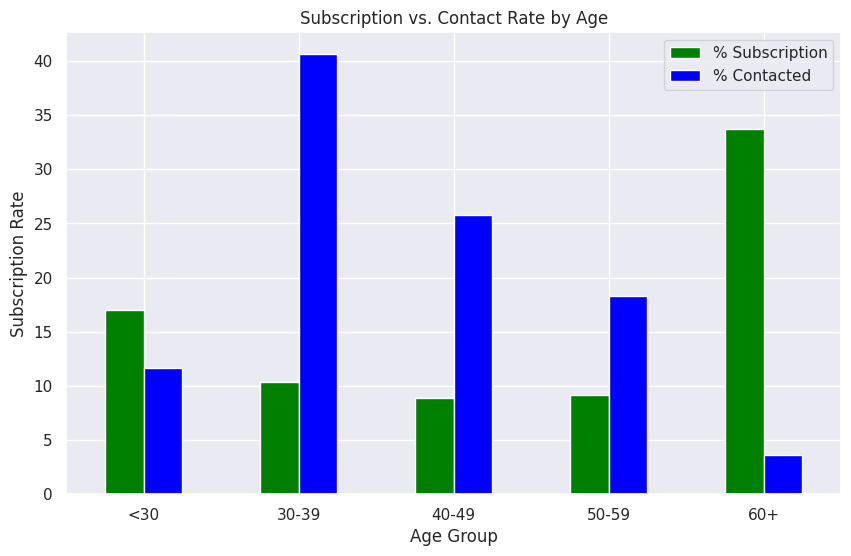

In [ ]:

age_plot = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(10,6), color = ('green','blue'))
plt.title('Subscription vs. Contact Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.show()

In [ ]:
#Visualizing the effect of balance on response rate
df_temp.loc[df_temp["balance"] <= 0,  'balance group'] = 'no balance'
df_temp.loc[(df_temp["balance"] > 0) & (df_temp["balance"] <= 1000), 'balance group'] = 'low balance'
df_temp.loc[(df_temp["balance"] > 1000) & (df_temp["balance"] <= 5000), 'balance group'] = 'average balance'
df_temp.loc[(df_temp["balance"] > 5000), 'balance group'] = 'high balance'
df_temp.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age group,balance group
0,58,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,False,50.0,average balance
1,44,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,False,40.0,low balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,False,30.0,low balance
5,35,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,False,30.0,low balance
6,28,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,False,20.0,low balance


In [ ]:
balance_response_pct = pd.crosstab(df_temp['response'],
                                   df_temp['balance group']).apply(lambda x: x/x.sum() * 100)
balance_response_pct = balance_response_pct.transpose()
balance_response_pct.columns=balance_response_pct.columns.astype(str)
balance_response_pct.rename(columns={'0':'No', '1':'Yes'},inplace=True)
balance_response_pct

response,False,True
balance group,,
average balance,85.208041,14.791959
high balance,84.947368,15.052632
low balance,89.263444,10.736556
no balance,93.101406,6.898594


In [ ]:

bal = pd.DataFrame(df_temp['balance group'].value_counts())
bal['% Contacted'] = bal['balance group']*100/bal['balance group'].sum()
bal['% Subscription'] = balance_response_pct['Yes']
bal.drop('balance group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)
bal


KeyError: 'balance group'

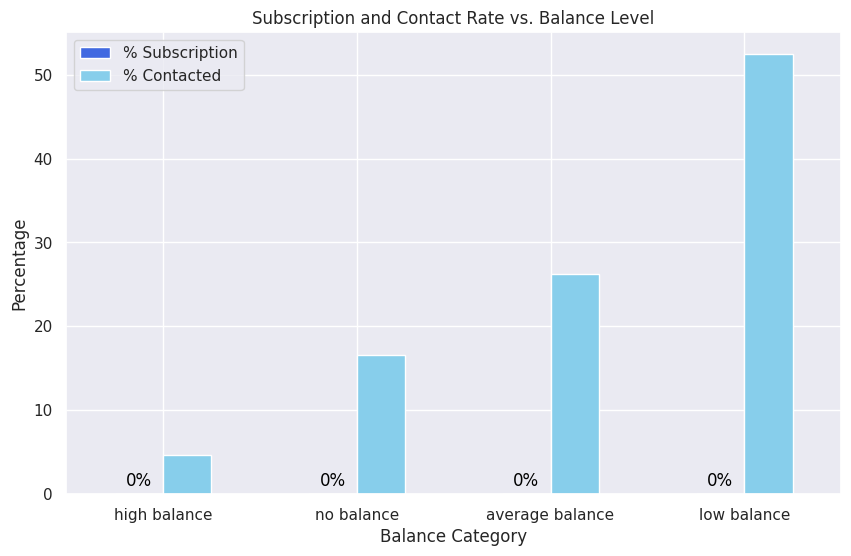

                 count  % Contacted  % Subscription  bal
balance group                                           
high balance      1900     4.670715               0    0
no balance        6755    16.605620               0    1
average balance  10695    26.291207               0    2
low balance      21329    52.432459               0    3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating balance groups
df_temp.loc[df_temp["balance"] <= 0, 'balance group'] = 'no balance'
df_temp.loc[(df_temp["balance"] > 0) & (df_temp["balance"] <= 1000), 'balance group'] = 'low balance'
df_temp.loc[(df_temp["balance"] > 1000) & (df_temp["balance"] <= 5000), 'balance group'] = 'average balance'
df_temp.loc[df_temp["balance"] > 5000, 'balance group'] = 'high balance'

# Calculate response percentage by balance group
balance_response_pct = pd.crosstab(df_temp['response'],
                                   df_temp['balance group']).apply(lambda x: x / x.sum() * 100)

# Transpose the DataFrame to have balance groups as rows
balance_response_pct = balance_response_pct.transpose()

# Rename columns for clarity
balance_response_pct.columns = ['No', 'Yes'] if 'Yes' in balance_response_pct.columns else list(balance_response_pct.columns)

# Create a DataFrame for balance group counts
bal = pd.DataFrame(df_temp['balance group'].value_counts())

# Rename the column for clarity
bal.rename(columns={'balance group': 'count'}, inplace=True)

# Calculate the percentage of people contacted
bal['% Contacted'] = bal['count'] * 100 / bal['count'].sum()

# Add the '% Subscription' column using the balance_response_pct DataFrame
# Use .reindex() to ensure all balance groups are included
bal['% Subscription'] = balance_response_pct.get('Yes', pd.Series(0, index=bal.index))

# Fill NaN values with 0 if any balance group has no subscription data
bal['% Subscription'] = bal['% Subscription'].fillna(0)

# Add an 'bal' column for sorting
bal['bal'] = [3, 2, 1, 0]  # Ensure this matches the order of your balance groups
bal = bal.sort_values('bal', ascending=True)

# Plotting
balance_plot = bal[['% Subscription', '% Contacted']].plot(kind='bar',
                                                           color=('royalblue', 'skyblue'),
                                                           figsize=(10, 6))

plt.title('Subscription and Contact Rate vs. Balance Level')
plt.ylabel('Percentage')
plt.xlabel('Balance Category')
plt.xticks(rotation='horizontal')

# Annotation
for rec, label in zip(balance_plot.patches,
                      bal['% Subscription'].round(1).astype(str)):
    balance_plot.text(rec.get_x() + rec.get_width() / 2,
                      rec.get_height() + 1,
                      label + '%',
                      ha='center',
                      color='black')

plt.show()

# Display the final DataFrame
print(bal)


In [ ]:

df_temp.rename(columns={'response':'response_binary'},inplace=True)

In [ ]:

#Visualizing subscription rate of different balance levels
df_temp.loc[df_temp['response_binary'] == 1,  'response'] = 'yes'
df_temp.loc[df_temp['response_binary'] == 0,  'response'] = 'no'

balance_age1 = pd.DataFrame(df_temp.groupby(['age group','balance group'])['response_binary'].sum())
balance_age2 = pd.DataFrame(df_temp.groupby(['age group','balance group'])['response'].count())

balance_age1['response'] = balance_age2['response']
balance_age1['response_rate'] = balance_age1['response_binary']/ (balance_age1['response'])
balance_age1 = balance_age1.drop(['response_binary','response'],axis =1)

balance_age1 = balance_age1.unstack()

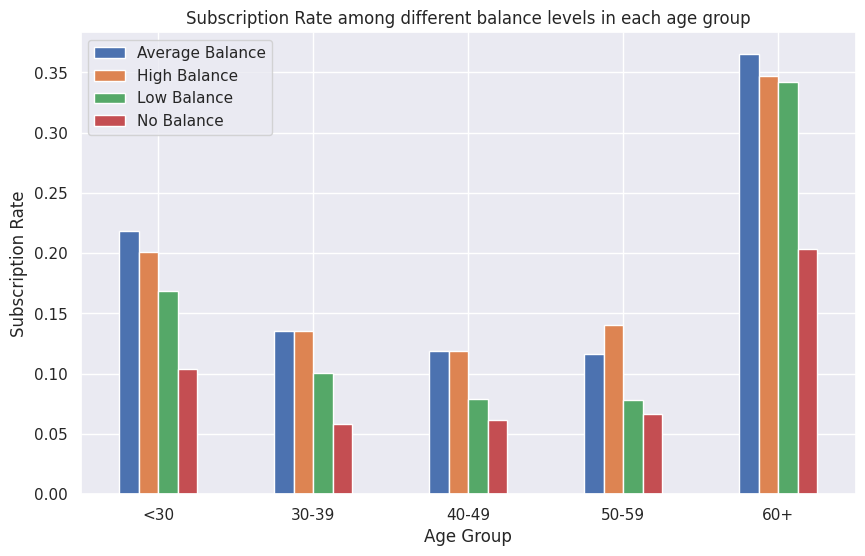

In [ ]:

bal_age = balance_age1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.title('Subscription Rate among different balance levels in each age group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.show()

In [ ]:

# Visualizing subscription rate by job
job_response_pct = pd.crosstab(df_temp['response'],df_temp['job']).apply(lambda x: x/x.sum() * 100)
job_response_pct = job_response_pct.transpose()
job_response_pct


response,no,yes
job,,
admin.,88.034006,11.965994
blue-collar,92.763831,7.236169
entrepreneur,91.865672,8.134328
housemaid,91.209748,8.790252
management,86.863615,13.136385
retired,77.821782,22.178218
self-employed,88.773389,11.226611
services,91.265456,8.734544
student,70.537010,29.462990


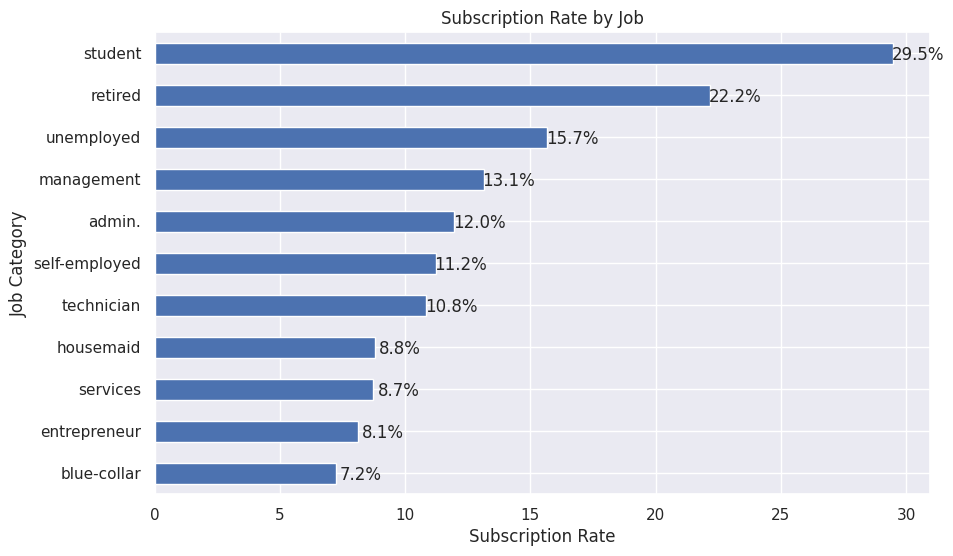

In [ ]:
job_plot = job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                            figsize = (10,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Annotation
for rec, label in zip(job_plot.patches,
                      job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    job_plot.text(rec.get_width()+1,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

In [ ]:

# Visualizing subscription rate by month

month_response_pct = pd.crosstab(df_temp['response'],
                                 df_temp['month']).apply(lambda x: x/x.sum() * 100)
month_response_pct = month_response_pct.transpose()
month_response_pct

response,no,yes
month,,
1,89.778535,10.221465
10,54.757930,45.242070
11,89.838803,10.161197
12,54.335260,45.664740
2,82.784698,17.215302
3,45.544554,54.455446
4,80.411555,19.588445
5,93.395848,6.604152
6,89.829451,10.170549


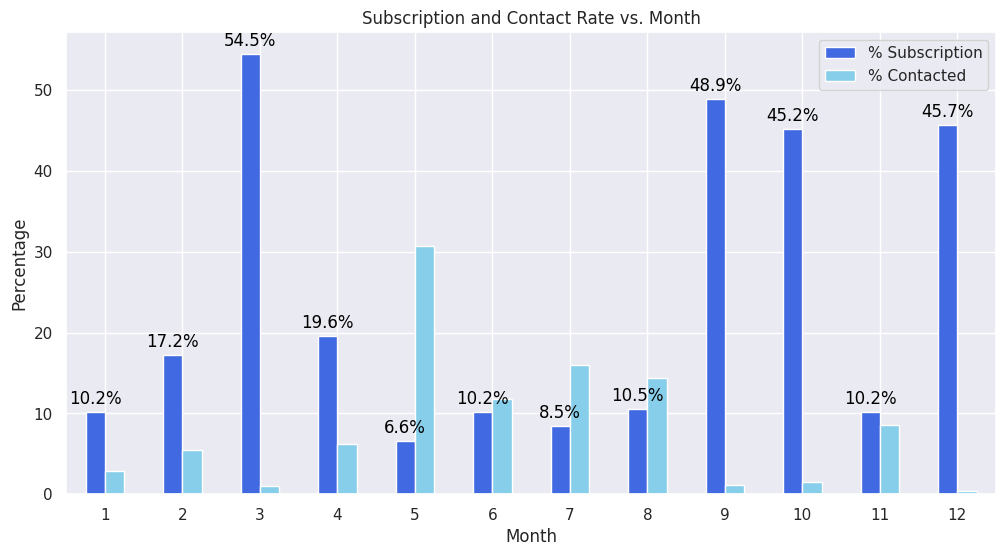

       count  % Contacted  % Subscription  Month
month                                           
1       1174     2.886010       10.221465      1
2       2248     5.526193       17.215302      2
3        404     0.993141       54.455446      3
4       2527     6.212050       19.588445      4
5      12477    30.671845        6.604152      5
6       4808    11.819366       10.170549      6
7       6499    15.976302        8.493614      7
8       5844    14.366135       10.489391      8
9        452     1.111138       48.893805      9
10       599     1.472504       45.242070     10
11      3474     8.540033       10.161197     11
12       173     0.425281       45.664740     12


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate response percentage by month
month_response_pct = pd.crosstab(df_temp['response'], df_temp['month']).apply(lambda x: x / x.sum() * 100)

# Transpose the DataFrame to have months as rows
month_response_pct = month_response_pct.transpose()

# Ensure that the 'yes' column exists, else use an empty series
month_response_pct.columns = ['No', 'Yes'] if 'yes' in month_response_pct.columns else list(month_response_pct.columns)

# Create a DataFrame for month counts
month = pd.DataFrame(df_temp['month'].value_counts())
month.rename(columns={'month': 'count'}, inplace=True)

# Calculate the percentage of people contacted
month['% Contacted'] = month['count'] * 100 / month['count'].sum()

# Add the '% Subscription' column using the month_response_pct DataFrame
month['% Subscription'] = month_response_pct.get('Yes', pd.Series(0, index=month.index))

# Fill NaN values with 0 if any month has no subscription data
month['% Subscription'] = month['% Subscription'].fillna(0)

# Add a 'Month' column for sorting
month['Month'] = [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
month = month.sort_values('Month', ascending=True)

# Plotting
month_plot = month[['% Subscription', '% Contacted']].plot(kind='bar',
                                                           color=('royalblue', 'skyblue'),
                                                           figsize=(12, 6))

plt.title('Subscription and Contact Rate vs. Month')
plt.ylabel('Percentage')
plt.xlabel('Month')
plt.xticks(rotation='horizontal')

# Annotation
for rec, label in zip(month_plot.patches,
                      month['% Subscription'].round(1).astype(str)):
    month_plot.text(rec.get_x() + rec.get_width() / 2,
                    rec.get_height() + 1,
                    label + '%',
                    ha='center',
                    color='black')

plt.show()

# Display the final DataFrame
print(month)


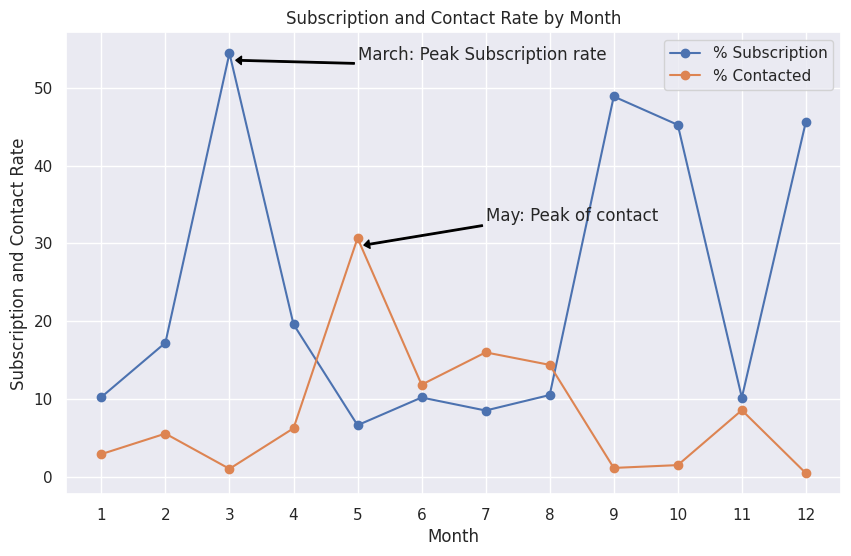

In [ ]:

month_plot = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription and Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks,np.arange(1,13,1))

# Annotation: Peak of contact
y = month['% Contacted'].max()
x = float(month['% Contacted'].idxmax())
plt.annotate('May: Peak of contact', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+4),
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'),
             horizontalalignment='left', verticalalignment='top')

# Annotation: Peak of subscription rate
y = month['% Subscription'].max()
x = float(month['% Subscription'].idxmax())
plt.annotate('March: Peak Subscription rate', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+1),
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'),
             horizontalalignment='left', verticalalignment='top')

plt.show()


In [ ]:

df5_copy=df5.copy()
df5_copy.sample(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
13529,57,self-employed,married,secondary,no,65,no,yes,9,7,2.85,1,-1,0,unknown,False
11793,55,services,divorced,secondary,no,1735,no,no,20,6,6.25,2,-1,0,unknown,False
34518,66,admin.,single,secondary,no,10177,no,no,5,5,4.53,4,-1,0,unknown,False
11107,37,blue-collar,single,secondary,no,415,no,no,18,6,3.38,1,-1,0,unknown,False
33716,29,self-employed,married,secondary,no,123,no,yes,21,4,2.63,2,181,1,success,True


In [ ]:
#Selecting required columns
df5_copy.drop(['marital'],axis=1, inplace=True)
df6 = df5_copy.iloc[:, 0:7]

In [ ]:

#Performing encoding of categorical variables
df7 = pd.get_dummies(df6, columns = ['job'])
df8 = pd.get_dummies(df7, columns = ['education'])
df8['housing'] = df8['housing'].map({'yes': 1, 'no': 0})
df8['default'] = df8['default'].map({'yes': 1, 'no': 0})
df8['loan'] = df8['loan'].map({'yes': 1, 'no': 0})
df_y = pd.DataFrame(df5_copy['response'])
df8 = pd.merge(df8, df_y, left_index = True, right_index = True)
df8.sample(5)

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,response
41983,55,0,865,1,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
13293,57,0,5,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
6678,28,0,1849,1,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1890,26,0,79,1,1,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
44377,32,0,8304,0,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [ ]:
# Selecting the model features
arr = df8.values

# Selecting first 20 columns as features
X = arr[:,0:-1]

# Selecting 'response' column as output
Y = arr[:,-1]

In [ ]:

# Importing modules for classification

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:

# Splitting the data 80:20
m= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=m, random_state=seed)


In [ ]:

# Creating a list of models to find the best
models = []
models.append(('LR', LogisticRegression(max_iter= 200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:

models

[('LR', LogisticRegression(max_iter=200)),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB())]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Creating a copy of the DataFrame and performing necessary transformations
df5_copy = df5.copy()

# Drop the 'marital' column and select the required columns
df5_copy.drop(['marital'], axis=1, inplace=True)
df6 = df5_copy.iloc[:, 0:7]

# Perform one-hot encoding
df7 = pd.get_dummies(df6, columns=['job'])
df8 = pd.get_dummies(df7, columns=['education'])

# Encode categorical variables as integers
df8['housing'] = df8['housing'].map({'yes': 1, 'no': 0})
df8['default'] = df8['default'].map({'yes': 1, 'no': 0})
df8['loan'] = df8['loan'].map({'yes': 1, 'no': 0})

# Merge response variable
df_y = pd.DataFrame(df5_copy['response'])
df8 = pd.merge(df8, df_y, left_index=True, right_index=True)

# Extract feature matrix X and target vector Y
arr = df8.values
X = arr[:, :-1]
Y = arr[:, -1]

# Ensure Y is in a suitable format (binary)
# Convert target variable to integers if necessary
if Y.dtype == 'object':
    Y = pd.factorize(Y)[0]

# Splitting the data into training and testing sets
m = 0.20
seed = 10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=m, random_state=seed)

# Creating and evaluating models
models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results_c = []
names_c = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    try:
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results_c.append(cv_results)
        names_c.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    except ValueError as e:
        print(f"Model {name} failed with error: {e}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.887134 (0.004914)
KNN: 0.876471 (0.005498)
CART: 0.831884 (0.006983)
NB: 0.824847 (0.004745)


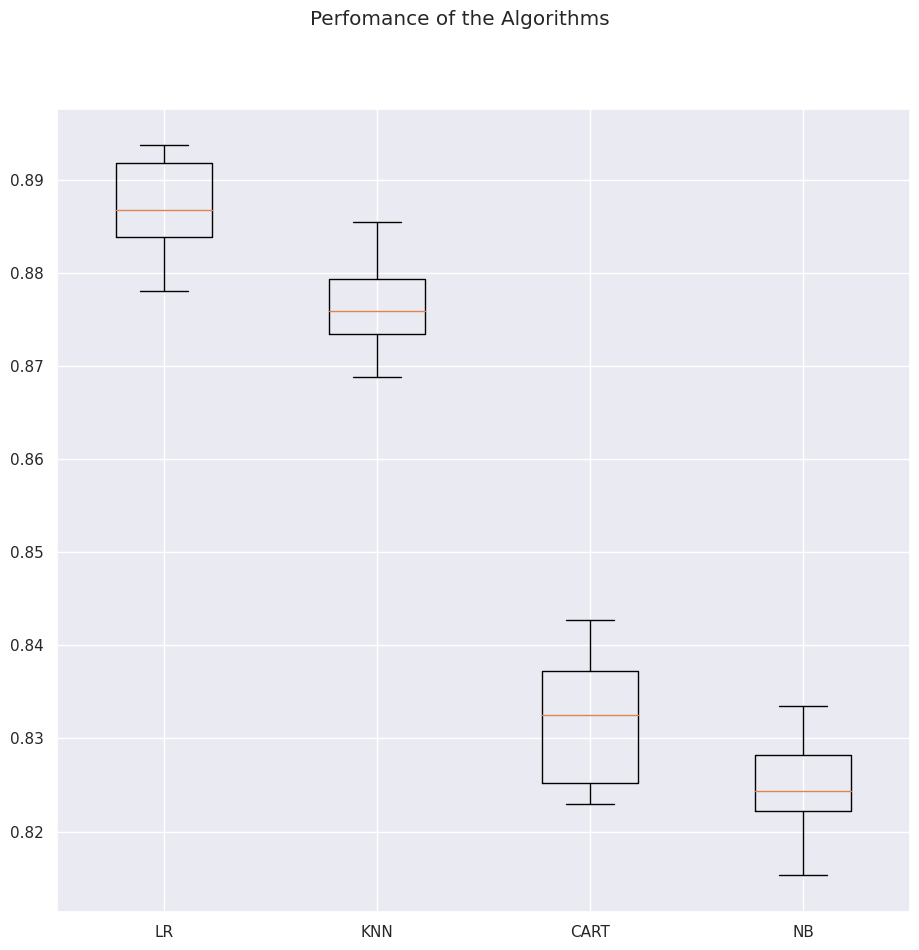

In [ ]:

# Plotting the performance of the algorithms
fig = plt.figure()
fig.suptitle('Perfomance of the Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.tight_layout(pad=3)
plt.show()


In [ ]:

#Predicting on the test set
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:

# Evaluating model performance
predictions = LR_model.predict(X_test)
# Calculating accuracy Score
print(accuracy_score(Y_test, predictions))

0.8831120943952803


[[7185    0]
 [ 951    0]]


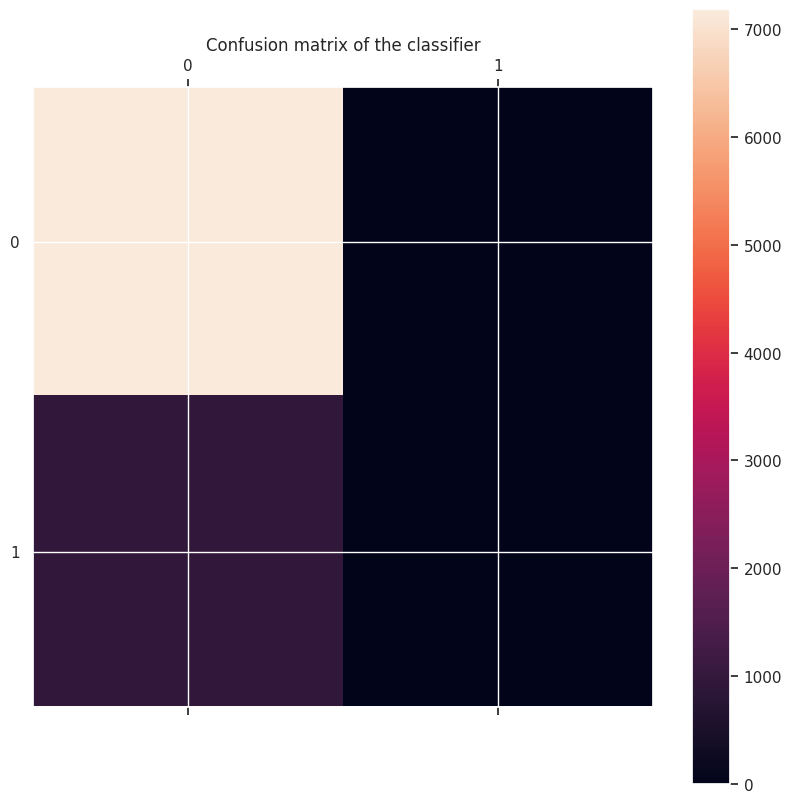

In [ ]:

# Visualizing the Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Analyzing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7185
           1       0.00      0.00      0.00       951

    accuracy                           0.88      8136
   macro avg       0.44      0.50      0.47      8136
weighted avg       0.78      0.88      0.83      8136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Creating X array that will contain features and y array will contain the target vector
X=df8.drop('response',axis=1)
y=df8['response']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',Y_train.shape)
print('y_test',Y_test.shape)

X_train (30509, 19)
X_test (10170, 19)
y_train (30509,)
y_test (10170,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import time

# Assuming df8 is your DataFrame containing the data
X = df8.drop('response', axis=1)
y = df8['response']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

start_time = time.time()

# Building XGB model for binary classification with validation set
model_new = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='error',
                          early_stopping_rounds=4, tree_method='hist')

model_new.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

predict2 = model_new.predict(X_train)

print("Time taken by XGB: " + str((time.time() - start_time)) + " Seconds")

[0]	validation_0-error:0.11980
[1]	validation_0-error:0.11980
[2]	validation_0-error:0.11980
[3]	validation_0-error:0.11980
Time taken by XGB: 1.7820947170257568 Seconds


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Assuming df8 is your DataFrame containing the data
X = df8.drop('response', axis=1)
y = df8['response']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building XGB model for binary classification with validation set
model_new = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='error',
                          early_stopping_rounds=4, tree_method='hist')

# Add validation set using eval_set parameter
model_new.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

predict2 = model_new.predict(X_test)  # Use X_test for prediction on the test set

# Creating Confusion Matrix using the test data and the predicted value
cm = confusion_matrix(y_test, predict2)
print(cm)

# Calculating the accuracy of the predicted value on the test data
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print('Accuracy =', round(accuracy * 100, 2))
# Calculating Sensitivity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Sensitivity =', round(sensitivity * 100, 2))

# Calculating Specificity
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Specificity =', round(specificity * 100, 2))


[0]	validation_0-error:0.12075
[1]	validation_0-error:0.12075
[2]	validation_0-error:0.12075
[3]	validation_0-error:0.12075
[[8942    0]
 [1228    0]]
Accuracy = 87.93
Sensitivity = 100.0
Specificity = 0.0


In [ ]:
# Predicting the target using the train data features
predict3=model_new.predict(X_test)

# Creating Confusion matrix using the test data and the predicted value
cm1=confusion_matrix(Y_test,predict3)
print(cm1)

# Calculating the accuracy of the train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy=',round(accuracy*100,2))

# Calculating the accuracy of the test data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy=',round(accuracy1*100,2))

[[8942    0]
 [1228    0]]
Train Accuracy= 87.93
Test Accuracy= 87.93


In [ ]:
# Analyzing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict3))


              precision    recall  f1-score   support

       False       0.88      1.00      0.94      8942
        True       0.00      0.00      0.00      1228

    accuracy                           0.88     10170
   macro avg       0.44      0.50      0.47     10170
weighted avg       0.77      0.88      0.82     10170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Conclusion and Recommendations
The data shows that the following demographics have a higher subscription rate:

Age group: < 30 or age > 60;

Occupation: Students or Retired people;

Therefore, the bank will get more success on approaching customers belonging to the above categories. Also, the Logistic Regression model can be applied to know if the customer will or will not subscribe, before calling the customer. In this way, the bank can take a targeted approach and increase the efficiency in converting customers.